In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ipywidgets import interact_manual
import ipywidgets as widgets

widgets.interact_manual.opts['manual_name'] = "Cycle!"
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

# **Midterm - Computational Chemodynamics**
|**Edwin Y. Saavedra Cifuentes**|
|---|

>Please check a standalone version of this midterm at:
>
>|**[Voila version]**:|[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/Midterm_LakeSediments/master?urlpath=voila%2Frender%2FSaavedraC_Midterm.ipynb)|
>|---|:-:|
>|**[Classic notebook]**:|[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/Midterm_LakeSediments/master?filepath=SaavedraC_Midterm.ipynb)|
>
>
>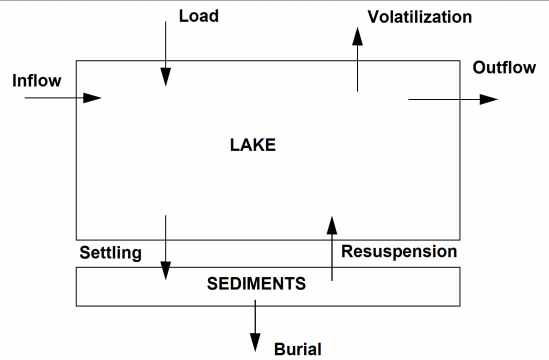
>
> *Boxes*

**Notation:**

The **mass** of pollutant (in units of kg) in each of the boxes is denoted as $X_{j,k}$ where $j$ corresponds to the box number and $k$ defines whether that contaminant mass is dissolved in aqueous solution or it is adsorbed to solid particles:

- $j=1$ is the water in the lake
- $j=2$ is the sediments


- $k=d$ is the dissolved mass in aqueous solution
- $k=p$ is the mass adsorbed to solid particles
- if $k$ is not noted, it means that we are refering to the total mass in the box

The contaminant **fluxes** (in units of kg/a) are denoted as $J_{i,j}$ where $i$ indicates the origin of the flux and $j$ the receiving end of the flux, thus:

- $J_{1,2}$ refers to settling
- $J_{2,1}$ refers to resuspension
- $J_{2,h}$ refers to burial
- $J_{1,a}$ refers to volatilization

-------------------------------

## **1. Mass balances**

### **1.1 System of differential equations (1/2)**

A mass balance around the volume of water in the lake and around the sediments gives:

\begin{equation}
\begin{cases}
    \dfrac{dX_1}{dt} =& \overbrace{Q_{in}C_{in}}^\text{Inflow} - \underbrace{Q_{out}C_{out}}_\text{Outflow} - \overbrace{J_{1,a}}^\text{Volatilization} - \underbrace{J_{1,2}}_\text{Settling} + \overbrace{J_{2,1}}^\text{Resuspension}\\
    \\
    \dfrac{dX_2}{dt} =& -\overbrace{J_{2,h}}^\text{Burial} + \underbrace{J_{1,2}}_\text{Settling} - \overbrace{J_{2,1}}^\text{Resuspension}
\end{cases}
\end{equation}

In addition, **partition** between the dissolved and adsorbed states has to be considered in the lake box. For the sediment box we will assume that the contaminant exist entirely adsorbed to a solid phase.

\begin{equation}
\begin{array}{rl}
    X_1 =& X_{1,d} + X_{1,p} \quad | \quad K_{d,p}=\dfrac{X_d}{X_p} = 1.0 \\
    X_2 =& X_{2,p}
\end{array}
\end{equation}

### **1.2 Mass fluxes**

Each of the terms in the system above can be written in terms of the contaminant concentration in each of the boxes.

**Inflow**

Assuming that the only source of pollutant comes from the spill:

- $Q_{in}C_{in} = 0$

**Outflow**

In this case, let's consider that both dissolved and adsorbed states of the contaminant can leave the system via the outflow of the lake. 

- $Q_{out}C_{out} = \dfrac{X_1Q}{V_L}$

**Volatilization**

This flux only affects the dissolved part of the contaminant. It is proportional to the surface of the lake exposed to the atmosphere, thus:

- $J_{1,a} = \dfrac{r_v A_{L,a}X_{1,d}}{V_L} = \dfrac{r_v A}{V_L\left(1+\dfrac{1}{K_{d,p}}\right)}X_1$

**Settling**

Similarly to volatilization, settling is proportional to the interface area between lake and sediments. However in this case, this process is proportional to the mass of contaminant adsorbed to the solid matter:

- $J_{1,2} = \dfrac{r_s A_{L,S}X_{1,p}}{V_L} = \dfrac{r_s A}{V_L\left(1+K_{d,p}\right)}X_1$

**Resuspension**

This one is proportional to the mass of contaminant in the sediments. We will assume that the contaminant in the sediments exists only adsorbed to the solids. 

- $J_{2,1} = \dfrac{r_r A_{L,S}X_{2,p}}{V_S} = \dfrac{r_r A}{V_S}X_2$

**Burial**

The mass leaving via burial exits the system forever:

- $J_{2,h} = \dfrac{r_b A_{S,h}X_{2,p}}{V_S} = \dfrac{r_b A}{V_S}X_2$

### **1.3 System of differential equations (2/2)**

Replacing the expressions above in the system of differential equations yields:

\begin{equation}
\begin{array}{rl}
    \dfrac{dX_1}{dt} =& -\underbrace{\dfrac{Q}{V_L}X_1}_\text{Outflow} - \overbrace{\dfrac{r_v A}{V_L\left(1+\dfrac{1}{K_{d,p}}\right)}X_1}^\text{Volatilization} - \underbrace{\dfrac{r_s A}{V_L\left(1+K_{d,p}\right)}X_1}_\text{Settling} + \overbrace{\dfrac{r_r A}{V_S}X_2}^\text{Resuspension}\\
    \\
    \dfrac{dX_2}{dt} =& -\overbrace{\dfrac{r_b A}{V_S}X_2}^\text{Burial} + \underbrace{\dfrac{r_s A }{V_L\left(1+K_{d,p}\right)}X_1}_\text{Settling} - \overbrace{\dfrac{r_r A}{V_S}X_2}^\text{Resuspension}
\end{array}
\end{equation}

Notice that the only unknowns in the system of equations are the concentrations of the contaminant in both boxes of the model. All the constants in each term are grouped in the $f_j$ variables, where $j$ denotes the process:

- $j=o$ for the water outflow from the lake
- $j=v$ for volatilization
- $j=s$ for settling
- $j=r$ for resuspension
- $j=b$ for burial

\begin{equation}
\begin{array}{rlcl}
    \dfrac{dX_1}{dt} =& -f_oX_1 - f_vX_1 - f_sX_1 + f_rX_2 &=& -\left( f_o+f_v+f_s \right) X_1 + f_rX_2\\
    \\
    \dfrac{dX_2}{dt} =& -f_bX_2 + f_sX_1 - f_rX_2  &=& f_sX_1 - \left(f_b+f_r \right) X_2\\
\end{array}
\end{equation}

This system, in matrix notation can be organized to:

\begin{equation}
\begin{array}{rl}
\dfrac{d}{dt}
\begin{pmatrix}
    X_1 \\ X_2
\end{pmatrix}
=&
\begin{pmatrix}
    -f_o-f_v-f_s & f_r\\
    f_s         & -f_b-f_r\\
\end{pmatrix}
\begin{pmatrix}
    X_1 \\ X_2
\end{pmatrix}
\\
\\
\boldsymbol{x}' =& \boldsymbol{Fx}
\end{array}
\end{equation}

### **1.4 Calculating the rate coefficients $f_j$**

The weight of the factors $f_j$ in the matrix $\boldsymbol{F}$ determines the nature of the process. The following piece of code calculates these factors with the data given:


In [2]:
## Flows
QFLOW  = 20.*1.0E+6; #m3/a

## Geometries
LAKEVOL  = 150*1.0E+6; #m3
SEDIVOL  = 100*1.0E+4; #m3
INTAREA  = 2.5E+6;     #m2

## Rates/flows
rSETTLING = 10.0;    #m/a 
rRESUSPEN = 1.0E-3;  #m/a
rBURIALVE = 2.0E-3;  #m/a
rVOLATILZ = 0.01*365 #m/a

## Partition coeffcient
PARTDISS = 1.0      #mg_dissolved/mg_adsorbed

## Exchange rates
F_OUT = QFLOW/LAKEVOL;
F_VOL = rVOLATILZ*INTAREA/LAKEVOL/(1+1/PARTDISS);
F_SET = rSETTLING*INTAREA/LAKEVOL/(1+PARTDISS);
F_RES = rRESUSPEN*INTAREA/SEDIVOL;
F_BUR = rBURIALVE*INTAREA/SEDIVOL;

print("Rates [1/a]:")
print("---------------------------")
print(" -         Outflow: %.4f " %F_OUT)
print(" -  Volatilization: %.4f " %F_VOL)
print(" -        Settling: %.4f " %F_SET)
print(" -    Resuspension: %.4f " %F_RES)
print(" -          Burial: %.4f " %F_BUR)

Rates [1/a]:
---------------------------
 -         Outflow: 0.1333 
 -  Volatilization: 0.0304 
 -        Settling: 0.0833 
 -    Resuspension: 0.0025 
 -          Burial: 0.0050 


### **1.5 What will happen when $t \to \infty$?**

Judging from the rate constants governing the system, the outflow from the lake will contribute the most in the removal of the contaminant from the lake. Volatilization and settling are also processes describing the contaminant leaving the system, and their contribution combined overweighs the only possible input to the lake that is the resuspension. Hence, as we advance in time, the contaminant mass is expected to approach zero. 

In the sediment bed the input comming from the settling of solids in the lake will push the mass of contaminant up for some time, as this rate exceeds the removal rates from resuspension and burial. However, this settling is proportional to the mass of contaminant on the lake which is always decreasing, meaning that at some point the only important phenomena in the sediments will be resuspension and burial, both removing the contaminant from the box. Thus, at $t \to \infty$ the concentration of contaminant in the sediments will slowly approach zero. 

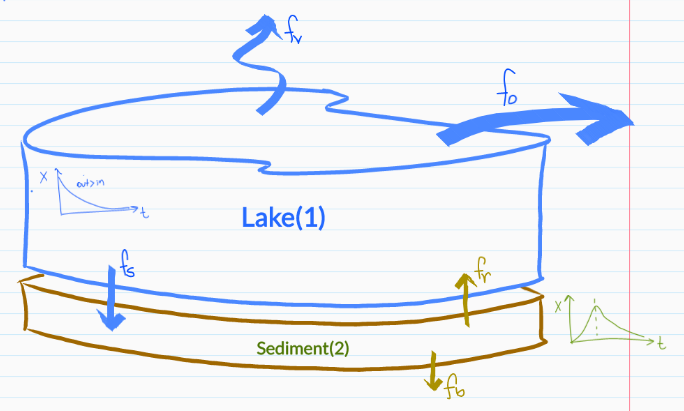

------------------------------
## **2. Simplifying assumption**

Turns out that the rates of resuspension and burial are between one and two orders or magnitude less than the other processes in the system. This means that the lake box will have the fastest response to the spill as the fastest rates directly affect this box. If we ignore their effects in our system, we can rewrite the system of equations as:

\begin{equation}
\begin{array}{rlcl}
    \dfrac{dX_1}{dt} =& -\left( f_o+f_v+f_s \right) X_1 + {f_rX_2} &=& -\left( f_o+f_v+f_s \right) X_1\\
    \\
    \dfrac{dX_2}{dt} =& f_sX_1 - \left(f_b+f_r \right) X_2 &=& f_sX_1\\
\end{array}
\end{equation}

Now, the mass balance around box No. 1 depends only of the concentration in that box, hence, we can directly integrate this equation to find a solution:

\begin{equation}
\begin{array}{rl}
    \dfrac{dX_1}{dt} =& -\left( f_o + f_v + f_s \right) X_1\\
    \\
    \dfrac{dX_1}{X_1} =&-\left( f_o + f_v + f_s \right) dt\\
    \\
    \ln{X_1} =& - \left( f_o + f_v + f_s \right)t + C_1\\
    \\
    X_1(t) =& C_2 \exp(- \left( f_o + f_v + f_s \right)t)\\
    \\
    X_1(t) =& X^0_1 \exp(- \left( f_o + f_v + f_s \right)t)
\end{array}
\end{equation}

>*$C$ is the integration constant which is solved from the initial condition $X_1(0) = X^0_1$.*

With an expression for $X_1(t)$, the mass balance in the sediments box can be solved too.

\begin{equation}
\begin{array}{rl}
    \dfrac{dX_2}{dt} =& f_sX_1\\
    \dfrac{dX_2}{dt} =& f_s X^0_1 \exp(- \overbrace{(f_o + f_v + f_s)}^{\alpha}t)\\
    \\
    dX_2 =& f_s X^0_1 \exp(-\alpha t) dt \\
    \\
    X_2(t) =& -\dfrac{f_s X^0_1}{\alpha} \exp(-\alpha t) + C\\
    \\
    X_2(t) =& -\dfrac{f_s X^0_1}{\alpha} \exp(-\alpha t) + X_2^0 + \dfrac{f_s X^0_1}{\alpha}\\
    \\
    X_2(t) =& \dfrac{f_s X^0_1}{\alpha} (1-\exp(-\alpha t)) + X_2^0\\
    \\
    X_2(t) =& \dfrac{f_s X^0_1}{f_o + f_v + f_s} (1-\exp(-(f_o + f_v + f_s) t)) + X_2^0\\
    \\
\end{array}
\end{equation}

>*$C$ is the integration constant which is solved from the initial condition $X_2(0) = X^0_2$. In this case $C = X_2^0 + \dfrac{f_s X^0_1}{\alpha}$*

Notice that since we are not considering any flux out of the sediments box, the mass that gets settled from the lake box will remain forever in there. Not necessarily the initial 5 kg of pollutant but just some fraction of it. Plotting this couple of simplified equations gives:

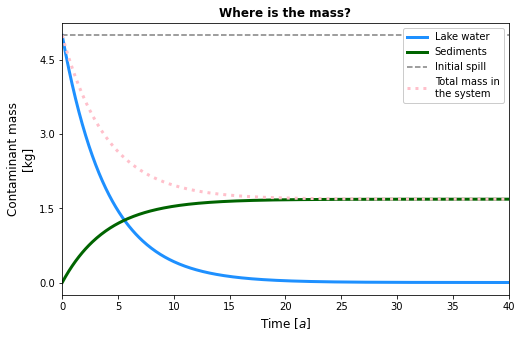

In [3]:
##################################################
## Define the time period to solve for
##################################################
TIME = np.arange(0,250.1,0.1)

##################################################
## Define the time initial conditions for 
## simplified problem
##################################################
X1ATT0 = 5.  #kg
X2ATT0 = 0.  #kg

##################################################
## Calculate the simplified case
##################################################
def solveSimpleCase(MASS_NOT,plot=True):
    ALPHA = F_OUT + F_VOL + F_SET;
    SIMPLYFY_X1 = MASS_NOT[0]*np.exp(-ALPHA*TIME);
    SIMPLYFY_X2 = F_SET*MASS_NOT[0]/ALPHA*(1-np.exp(-ALPHA*TIME)) + MASS_NOT[1];
    if plot : plotSimple(SIMPLYFY_X1,SIMPLYFY_X2,accesories=True);
    return np.array((SIMPLYFY_X1,SIMPLYFY_X2));

##################################################
## Plot the simplified case
##################################################
def plotSimple(SIMPLYFY_X1,SIMPLYFY_X2,accesories=False):
    fig = plt.figure(figsize=(8,5),facecolor="white");
    
    Labels = ["Lake water","Sediments"]
    Colors = ["dodgerblue","darkgreen"]
    FaceColors = ["aliceblue","honeydew"]
    
    ## Concentration in the lake
    ax1 = plt.subplot(1,1,1)
    ax1.plot(TIME,SIMPLYFY_X1,label=Labels[0],c=Colors[0],lw=3)
    ax1.plot(TIME,SIMPLYFY_X2,label=Labels[1],c=Colors[1],lw=3)
    
    ax1.set_xlim(TIME[0],40)
    ax1.set_title("Where is the mass?" ,fontweight="bold")
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.set_ylabel("Contaminant mass\n[kg]",fontsize="large")
    ax1.set_xlabel("Time [$a$]",fontsize="large")
    
    if accesories : 
        ax1.axhline(y=5,ls="dashed",c="gray",label="Initial spill")
        ax1.plot(TIME,SIMPLYFY_X1+SIMPLYFY_X2,label="Total mass in\nthe system",c="pink",lw=3,ls="dotted")
    
    ax1.legend(loc="upper right",framealpha=1)

solveSimpleCase([X1ATT0,X2ATT0],plot=True);

_______________
## **3. Rigorous solution**

Coming back to our original system without the assumptions made in **2**

\begin{equation}
\begin{array}{rl}
\dfrac{d}{dt}
\begin{pmatrix}
    X_1 \\ X_2
\end{pmatrix}
=&
\begin{pmatrix}
    f_o-f_v-f_s & f_r\\
    f_s         & -f_b-f_r\\
\end{pmatrix}
\begin{pmatrix}
    X_1 \\ X_2
\end{pmatrix}
\\
\\
\boldsymbol{x}' =& \boldsymbol{Fx}
\end{array}
\end{equation}

From [**Homework \#3**](https://mybinder.org/v2/gh/edsaac/LinearBoxModels/master?urlpath=voila%2Frender%2FSaavedraC_hw3.ipynb) we found that...

>...this first-order differential equation system $\boldsymbol{x}' = \boldsymbol{Fx}$ should have a solution of the form:
> 
> $\boldsymbol{x}(t) = \sum_\limits{i=1}^\limits{n} c_i\exp{(\lambda_i t)}\boldsymbol{u}_i = U \cdot (C * \exp{\Lambda_t })$
>
> Where:
>- The integration constants are grouped as $C=(c_1,c_2)$ 
>- The eigenvalues are grouped as a vector $\Lambda = (\lambda_1,\lambda_2)$
>- The scalar multiplication of $\Lambda$ by the independent variable $t$ is $\Lambda_t = (\lambda_1t,\lambda_2t)$
>- The $*$ operation is a element-wise multiplication: $C*X = (c_1X_1,c_2X_2)$. 
>- The eigenvectors $u_i$ can be aranged in a matrix $U$ where each column represents each eigenvector.
>
>For an initial condition $\boldsymbol{x}(t=0) = \boldsymbol{x}_0 \: \Leftarrow \: \exp{\Lambda_t}= 1$, hence:
>
> $\boldsymbol{x}_0 = UC \quad \Rightarrow \quad C = U^{-1}\boldsymbol{x}_0$
>
>Therefore, for a given time $t>0$, the state of the system is given by 
>
>$\boldsymbol{x}(t) = U\cdot(C * \exp{\Lambda}t)$.
>

In this sense, let's calculate the eigenvalues, eigenvectors for our matrix's system: 

In [4]:
##################################################
## Characteristics of K matrix
##################################################
FMATRIX = np.array([[-F_OUT-F_VOL-F_SET, F_RES],\
                   [F_SET, -F_BUR-F_RES]]);
print("F = ")
print(FMATRIX)
EigVal, EigVect = np.linalg.eig(FMATRIX);

print("\nEigenvectors:")
for i in range(len(EigVect)):
    print("   u%i = " %(i+1), end=" ")
    print(EigVect[i])
    
print("\nEigenvalues:")
for i in range(len(EigVal)):
    print("         λ%i =  %.2e" %(i+1,EigVal[i]))

print("---------------------------")
print("      Trace Σλ = %.3e" %np.trace(FMATRIX))
print("   Determinant = %.3e   (as np.det)" %np.linalg.det(FMATRIX))

# np.linalg.det should be equal to Πλ but sometimes
# it gets freaky

def multiEigs(Eigs):
    DET = 1
    for i in Eigs: DET = DET*i
    return DET
    
print("   Determinant = %.3e   (as Πλ)" %multiEigs(EigVal))

F = 
[[-0.2471  0.0025]
 [ 0.0833 -0.0075]]

Eigenvectors:
   u1 =  [-0.9449 -0.0104]
   u2 =  [ 0.3275 -0.9999]

Eigenvalues:
         λ1 =  -2.48e-01
         λ2 =  -6.63e-03
---------------------------
      Trace Σλ = -2.546e-01
   Determinant = 1.645e-03   (as np.det)
   Determinant = 1.645e-03   (as Πλ)


Both eigenvalues are real and negative, which means that a unique steady-state solution exists, regardless the initial conditions. The integration constants are a function of the initial condition of the problem, thus, they are solved each time the system needs to be solved. The following piece of code has the function that takes care of that:

In [5]:
##################################################
## Solve the system for the given time t and 
## initial conditions MASS_NOT
##################################################
def SolveSystem(MASS_NOT):
    #Simplified case
    SIMPLEANSW = solveSimpleCase(MASS_NOT,plot=False);
    
    #Calculate integration constants
    INTEGRC = np.dot(np.linalg.inv(EigVect),MASS_NOT);
    
    #Solve for all the timesteps!
    ANSW = np.zeros_like(EigVal); #Initialize matrix to store results
    for t in TIME:
        EXPT = np.exp(EigVal*t);                   #exp(λt)
        COEF = np.multiply(INTEGRC,EXPT);          #c.exp(λt)
        MofT = np.dot(EigVect,COEF);               #c.exp(λt)u
        ANSW = np.vstack((ANSW,MofT));             #Store results
    
    ANSW = np.delete(ANSW,0,axis=0) #Trim first row of zeros
    plotResults(ANSW,SIMPLEANSW);
    return ANSW;

-----------------------
## **4. Comparison of results**

The next portion of the code is the function in charge of plotting the results of both the simplified version of our problem and the rigorous solution found in **3**. 

In [6]:
##################################################
## Pretty plotting
##################################################
def plotResults(ANSW,SIMPLEANSW):
    fig = plt.figure(figsize=(12,8),facecolor="white");
    gs1 = gs.GridSpec(nrows=4,ncols=4)
    
    #Turn masses into concentrations in ppt
    CONC = np.zeros_like(ANSW);
    CONC[:,0] = ANSW[:,0]/LAKEVOL*(1000)**3; #Convert to ppt
    CONC[:,1] = ANSW[:,1]/SEDIVOL*(1000)**2; #Convert to ppb
    
    SIMPLECONC = np.zeros_like(SIMPLEANSW)
    SIMPLECONC[0] = SIMPLEANSW[0]/LAKEVOL*(1000)**3; #Convert to ppt
    SIMPLECONC[1] = SIMPLEANSW[1]/SEDIVOL*(1000)**2; #Convert to ppb
    
    #Labels and things
    Labels = ["Lake water","Sediments"]
    Units  = ["ppt","ppb"]
    Colors = ["dodgerblue","darkgreen"]
    DashColors = ["navy","darkslategray"]
    FaceColors = ["aliceblue","honeydew"]
    
    #Useful times
    WhenSedimentPeak = TIME[int(np.argmax(CONC[:,1]))];
    WhenCanWeDrink   = TIME[int(np.argmin(abs(1.0-CONC[:,0])))];
    
    ##################################################
    ## Evolution of each box in the system over time
    ##################################################
    ax1 = plt.subplot(gs1[0:2,0:2])
    for i in range(len(EigVal)):
        ax2 = plt.subplot(gs1[i*2:i*2+2,0:2],sharex=ax1)
        ax2.set_facecolor(FaceColors[i])
        ax2.plot(TIME,CONC[:,i],label=Labels[i],c=Colors[i],lw=5)
        ax2.plot(TIME,SIMPLECONC[i],label=Labels[i],c=DashColors[i],lw=1,ls='dashed')
        ax2.get_shared_x_axes().join(ax1, ax2)
        ax2.set_xlim(TIME[0],TIME[-2])
        ax2.text(45,(max(CONC[:,i])+min(CONC[:,i]))/2,Labels[i],\
             fontdict={'weight':'bold','size':10,'color':Colors[i]})
        ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax2.set_ylabel("Contaminant Concentration [%s]" %Units[i])
        if i == 0: 
            ax2.axvline(x=WhenCanWeDrink,ls="dotted",lw=1,c="gray")
            #ax2.yaxis.set_label_coords(-0.05, -0.15)
            ax2.annotate("Safe to drink after %i years"\
                         %WhenCanWeDrink,\
                         xy=(100, max(CONC[:,i])*0.8),\
                         ha='center',fontsize="small",bbox=dict(facecolor='red', alpha=0.2))
        if i == 1:
            ax2.axvline(x=WhenSedimentPeak,ls="dotted",lw=1,c="gray")
            ax2.annotate("Peak concentration\nof %.0f ppb\nafter %i years"\
                         %(np.max(CONC[:,i]),WhenSedimentPeak),\
                         xy=(100, max(CONC[:,i])*0.8),\
                         ha='center',fontsize="small",bbox=dict(facecolor='red', alpha=0.2))
            
    fig.subplots_adjust(hspace=0,wspace=0.03)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    ax2.set_xlabel("Time [$a$]",fontsize="large")
    
    ##################################################
    ## Evolution of all boxes over time
    ##################################################
    ax1 = plt.subplot(gs1[1:4,2:4])
    for i in range(len(EigVal)):
        ax1.plot(TIME,ANSW[:,i],label="Rigorous " + DESCR[i],c=Colors[i],lw=5)
        ax1.plot(TIME,SIMPLEANSW[i],label="Simple " + DESCR[i],c=DashColors[i],lw=1,ls="dashed")
    ax1.set_xlim(TIME[0],30)
    ax1.set_ylim(bottom=0)
    ax1.yaxis.tick_right()
    ax1.set_ylabel("Contaminant Mass [kg]",rotation=270)
    ax1.set_xlabel("Time [$a$]",fontsize="large")
    ax1.yaxis.set_label_coords(1.12,0.5)
    ax1.legend(ncol=2)    
    
    ##################################################
    ## Where's the carbon? Initial and end states
    ##################################################
    scX,scY = [3,7],[5,5]
    scXt,scYt = [1,8],[9,8.5]
    ## Initial condition
    ax3 = plt.subplot(gs1[0,2])
    ax3.set_xlim(0,10)
    ax3.set_ylim(0,10)
    ax3.scatter(scX,scY,c=FaceColors,s=1000*(ANSW[0,:]),linewidths=3,edgecolors=Colors)
    ax3.axes.xaxis.set_visible(False)
    ax3.axes.yaxis.set_visible(False)
    ax3.set_frame_on(False)
    ax3.set_title("Initial Condition",fontsize="small")
    for i,txt in enumerate(ANSW[0,:]): 
        ax3.annotate("%.0f" %txt,(scXt[i],scYt[i]),\
                     c=Colors[i],fontsize="small",fontweight="bold",\
                     va='center',ha='center',size=12,zorder=4)
    
    ## At the sediment peak
    ax4 = plt.subplot(gs1[0,3])
    ax4.set_xlim(0,10)
    ax4.set_ylim(0,10)
    ax4.scatter(scX,scY,c=FaceColors,s=100*(ANSW[int(np.argmax(CONC[:,1])),:]),linewidths=3,edgecolors=Colors)
    ax4.axes.xaxis.set_visible(False)
    ax4.axes.yaxis.set_visible(False)
    ax4.set_frame_on(False)
    ax4.set_title("After %i years" %WhenSedimentPeak,fontsize="small")
    for i,txt in enumerate(ANSW[int(np.argmax(CONC[:,1])),:]): 
        ax4.annotate("%.0f" %txt,(scXt[i],scYt[i]),\
                     c=Colors[i],fontsize="small",fontweight="bold",\
                     va='center',ha='center',size=12)     
    plt.show();

In [7]:
##################################################
## Dummy function to assemble the 
## initial condition MASS_NOT
##################################################
def RunAll(M1,M2,returner=False):
    MASS_NOT = np.array([M1,M2],dtype=float);
    MODEL = SolveSystem(MASS_NOT);
    if returner : return MODEL;

In [8]:
##################################################
## Interactive sliders to set the 
## initial condition
##################################################

#Sliders description
DESCR = ["Lake (1)",\
         "Sediment (2)"]

#Solve!


In [9]:
interact_manual(RunAll,
              M1=widgets.IntSlider(description=DESCR[0], min=0, max=20, value=5 , step=1),\
              M2=widgets.IntSlider(description=DESCR[1], min=0, max=20, value=0 , step=1),\
              returner = widgets.fixed(False));

interactive(children=(IntSlider(value=5, description='Lake (1)', max=20), IntSlider(value=0, description='Sedi…

In case the widget above did not work, here is the solution for the **5 kg** spill of the contaminant.

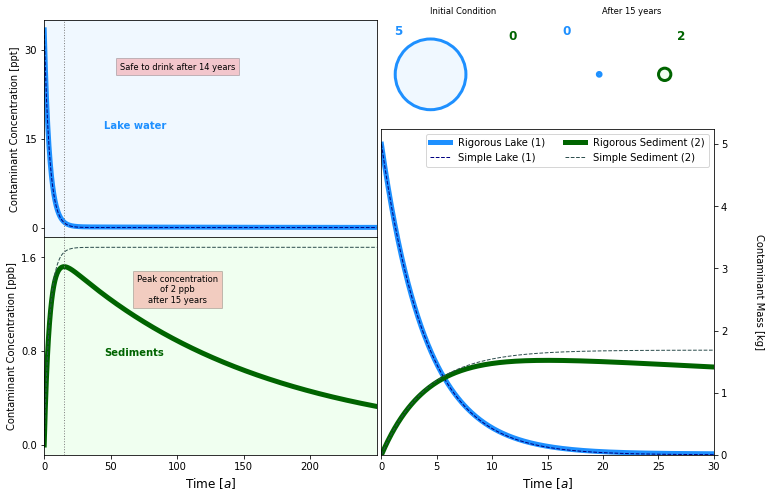

In [10]:
##################################################
## Solve manually if widgets did not work :(
##################################################
#Initial masses
M1 = 5.  # kg in Lake
M2 = 0.0  # kg in Sediments

#Solve!
MODEL = RunAll(M1,M2,returner=True);

The simplified version of the problem matches quite well the solution found where no assumptions were made over the model. For the simplified version of the sediments we stopped considering the burial of the contaminant and its resuspension, thus this mass was bound to remain forever in that box. However, for the rigorous model, this *burial* of the contaminant must satisfy that it never comes back to the system, which might not be the best approach for a persistent contaminant or a disturbed lake. 

-----------------------
## **5. Characteristic times**

The characteristic time defined as the time it takes for the signal to decrease to 37% the initial perturbation is found:


In [11]:
WhereCharacLake = int(np.argmin(np.abs(np.max(MODEL[:,0])/np.exp(1)-MODEL[:,0])))
WhereCharacSedi = int(np.argmin(np.abs(np.max(MODEL[:,1])/np.exp(1)-MODEL[:,1])))

##################################################
## Print residence and response time
##################################################
print("\nIndividual response times [a]:")
print("  ·         Lake: %6.2f"               %TIME[WhereCharacLake])
print("  ·    Sediments: %6.2f  (After peak)" %TIME[WhereCharacSedi])

print("\n\nSystem's response time [a]:")
print("  · as  1/tr(K): %.2f" %(-1./np.trace(FMATRIX)))
print("  · as 1/min(λ): %.2f" %(-1./min(EigVal)))


Individual response times [a]:
  ·         Lake:   4.10
  ·    Sediments: 169.80  (After peak)


System's response time [a]:
  · as  1/tr(K): 3.93
  · as 1/min(λ): 4.03



### **5.1 When is safe to drink water again?**

The time at which it would be safe to drink water from the lake is shown in the plot. According to these calculation, only after **14 years** the concentration of contaminant in the lake will be less than 1 ppt (given that the initial mass of the spill is **5 kg**).